In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [2]:
# Question 1: How many rows and columns are present in the data? [0.5 mark]
# Answer: 

df.shape()


# Question 2: What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]
# Answer: See below chart

'''
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64 
'''


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [3]:

# Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

# Quick Check for Null Values
is_null = df.isnull().sum()

# Check for duplicate order_id (I know you didn't ask, but it seemed like a good idea at this step)
duplcate_orders = df.duplicated(subset = 'order_id').sum()

print(is_null + duplcate_orders)

# Data looks pretty clean! No missing values and no duplicate orders

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [4]:

# Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

# Let's decribe this in two ways!

# Minimum time to prepare food
print('min_time:', df['food_preparation_time'].min(), 'minutes')

# Average time to prepare food
print('avg_time:', df['food_preparation_time'].mean().round(2), 'minutes')

# Maximum time to prepare food
print('max_time:', df['food_preparation_time'].max(),'minutes')

# Alternative method, using describe()
df.describe()

min_time: 20 minutes
avg_time: 27.37 minutes
max_time: 35 minutes


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [5]:
# Question 5: How many orders are not rated? [1 mark]

print('There are', sum(df['rating'] == 'Not given'), 'orders with "No rating" given.')



There are 736 orders with "No rating" given.


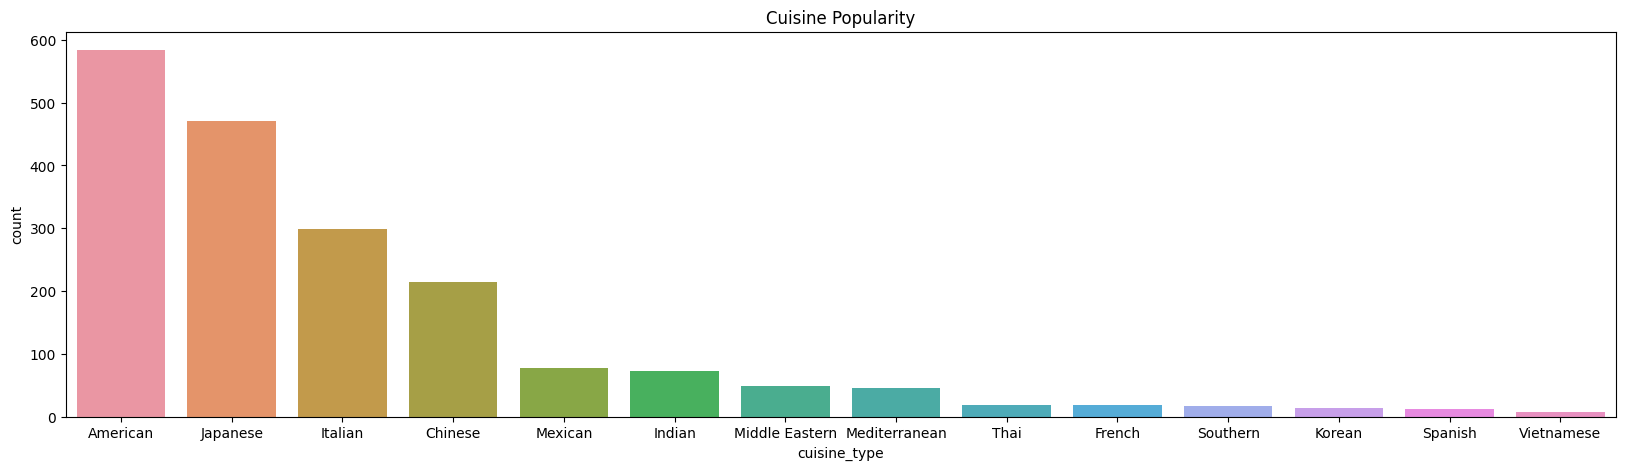

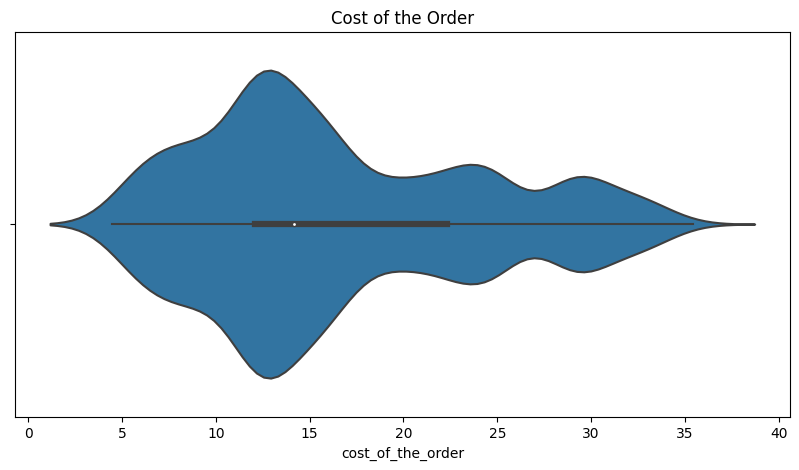

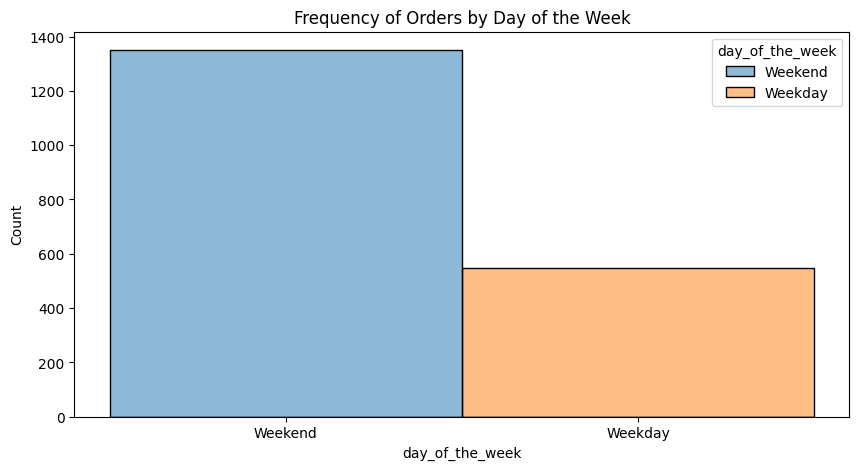

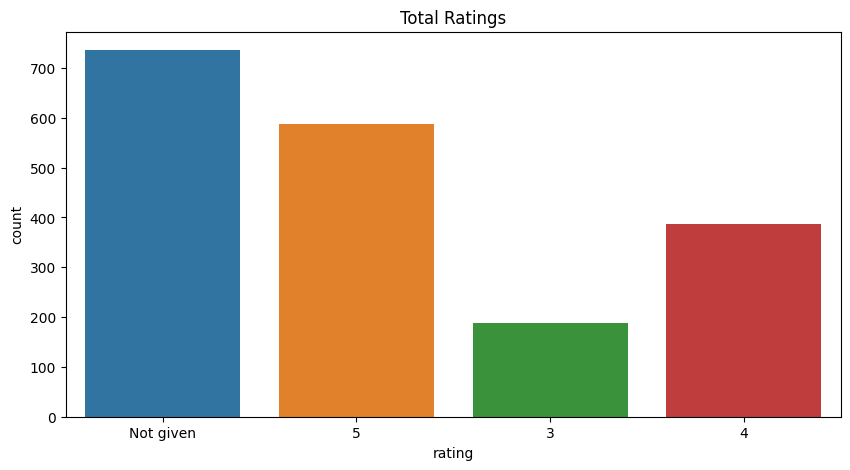

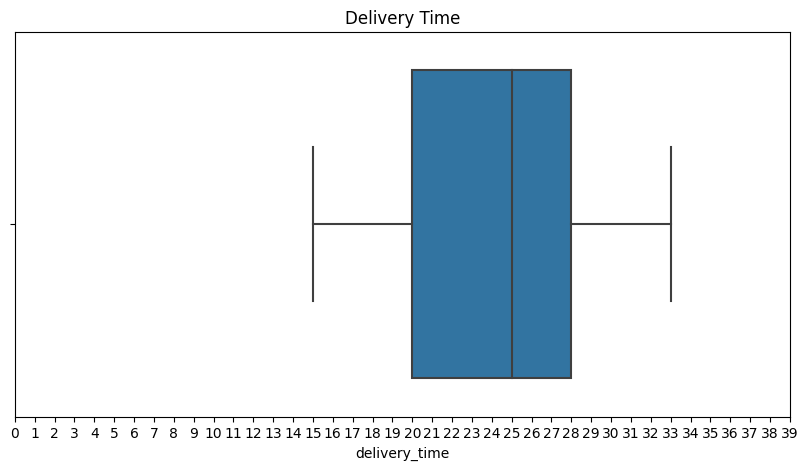

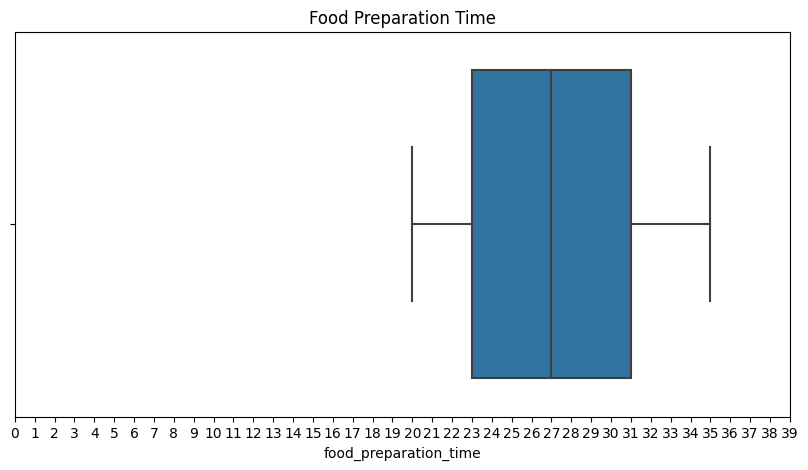

In [6]:
# Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

# bar chart of cuiseine type using seaborn
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title('Cuisine Popularity')
plt.show()
# Looks like the most popular cuisine is American, followed by Japanese, and Italian. 


# violin plot of the cost of the order
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='cost_of_the_order')
plt.title('Cost of the Order')
plt.show()
# Looks like the cost of the order is usally between $5 and $20. However it is distributed quite widely, with some orders costing as much as $35.

#histogram of the day of the week
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='day_of_the_week', hue='day_of_the_week')
plt.title('Frequency of Orders by Day of the Week')
plt.show()
# More than twice as many orders are placed on weekends than on weekdays.

#histogram of rating
#order_list = [5,4,3,'Not given']
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating')
plt.title('Total Ratings')
plt.show()
# Most people rate ether 5 stars or not at all.


# boxplot of the delivery time
plt.figure(figsize=(10,5))
deliv_time = sns.boxplot(data=df, x='delivery_time')
deliv_time.set_xticks(range(40))
plt.title('Delivery Time')
plt.show()
# The max delivery time is 33 minutes, with most taking between 20 and 28 minutes.


# boxplot of food preparation time
plt.figure(figsize=(10,5))
prep_time = sns.boxplot(data=df, x='food_preparation_time')
prep_time.set_xticks(range(40))
plt.title('Food Preparation Time')
plt.show()
# Most food prep takes a little longer then delivery time, instead most taking between 23 and 31 minutes.





In [7]:
# Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]


df['restaurant_name'].value_counts().head(5)

# Shake Shack                  219 orders
# The Meatball Shop            132 orders
# Blue Ribbon Sushi            119 orders
# Blue Ribbon Fried Chicken     96 orders
# Parm                          68 orders


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [8]:
# Question 8: Which is the most popular cuisine on weekends? [1 mark]


df.groupby('day_of_the_week')['cuisine_type'].value_counts().head(1)

# American Food is the most popular cuisine on weekends




day_of_the_week  cuisine_type
Weekday          American        169
Name: count, dtype: int64

In [9]:
# Question 9: What percentage of the orders cost more than 20 dollars? [1 marks]

#Count how many orders are over 20 dollars divided by the total number of orders
round(sum(df['cost_of_the_order'] > 20)/df.shape[0], 2)

# 29% of orders cost more than 20 dollars



0.29

In [10]:

# Question 10: What is the mean order delivery time? [1 mark]
round(df['delivery_time'].mean(), 2)

# The mean order delivery time is 24.16 minutes


24.16

In [11]:

# Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]
df['customer_id'].value_counts().head(3)

# customer_id     total_orders
# 52832           13
# 47440           10
# 83287           9


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

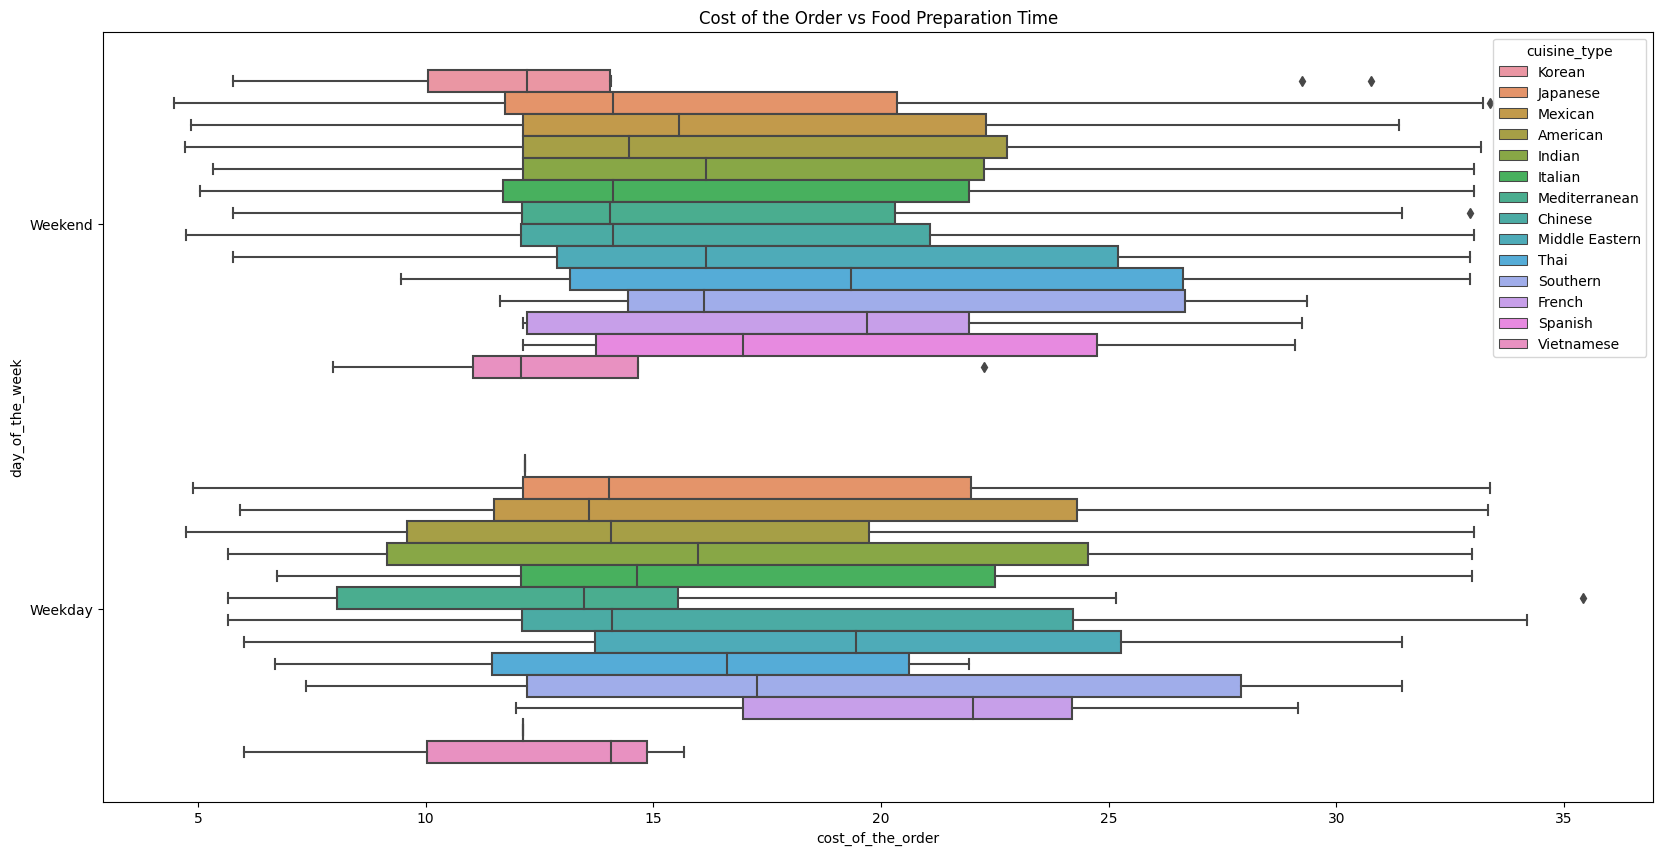

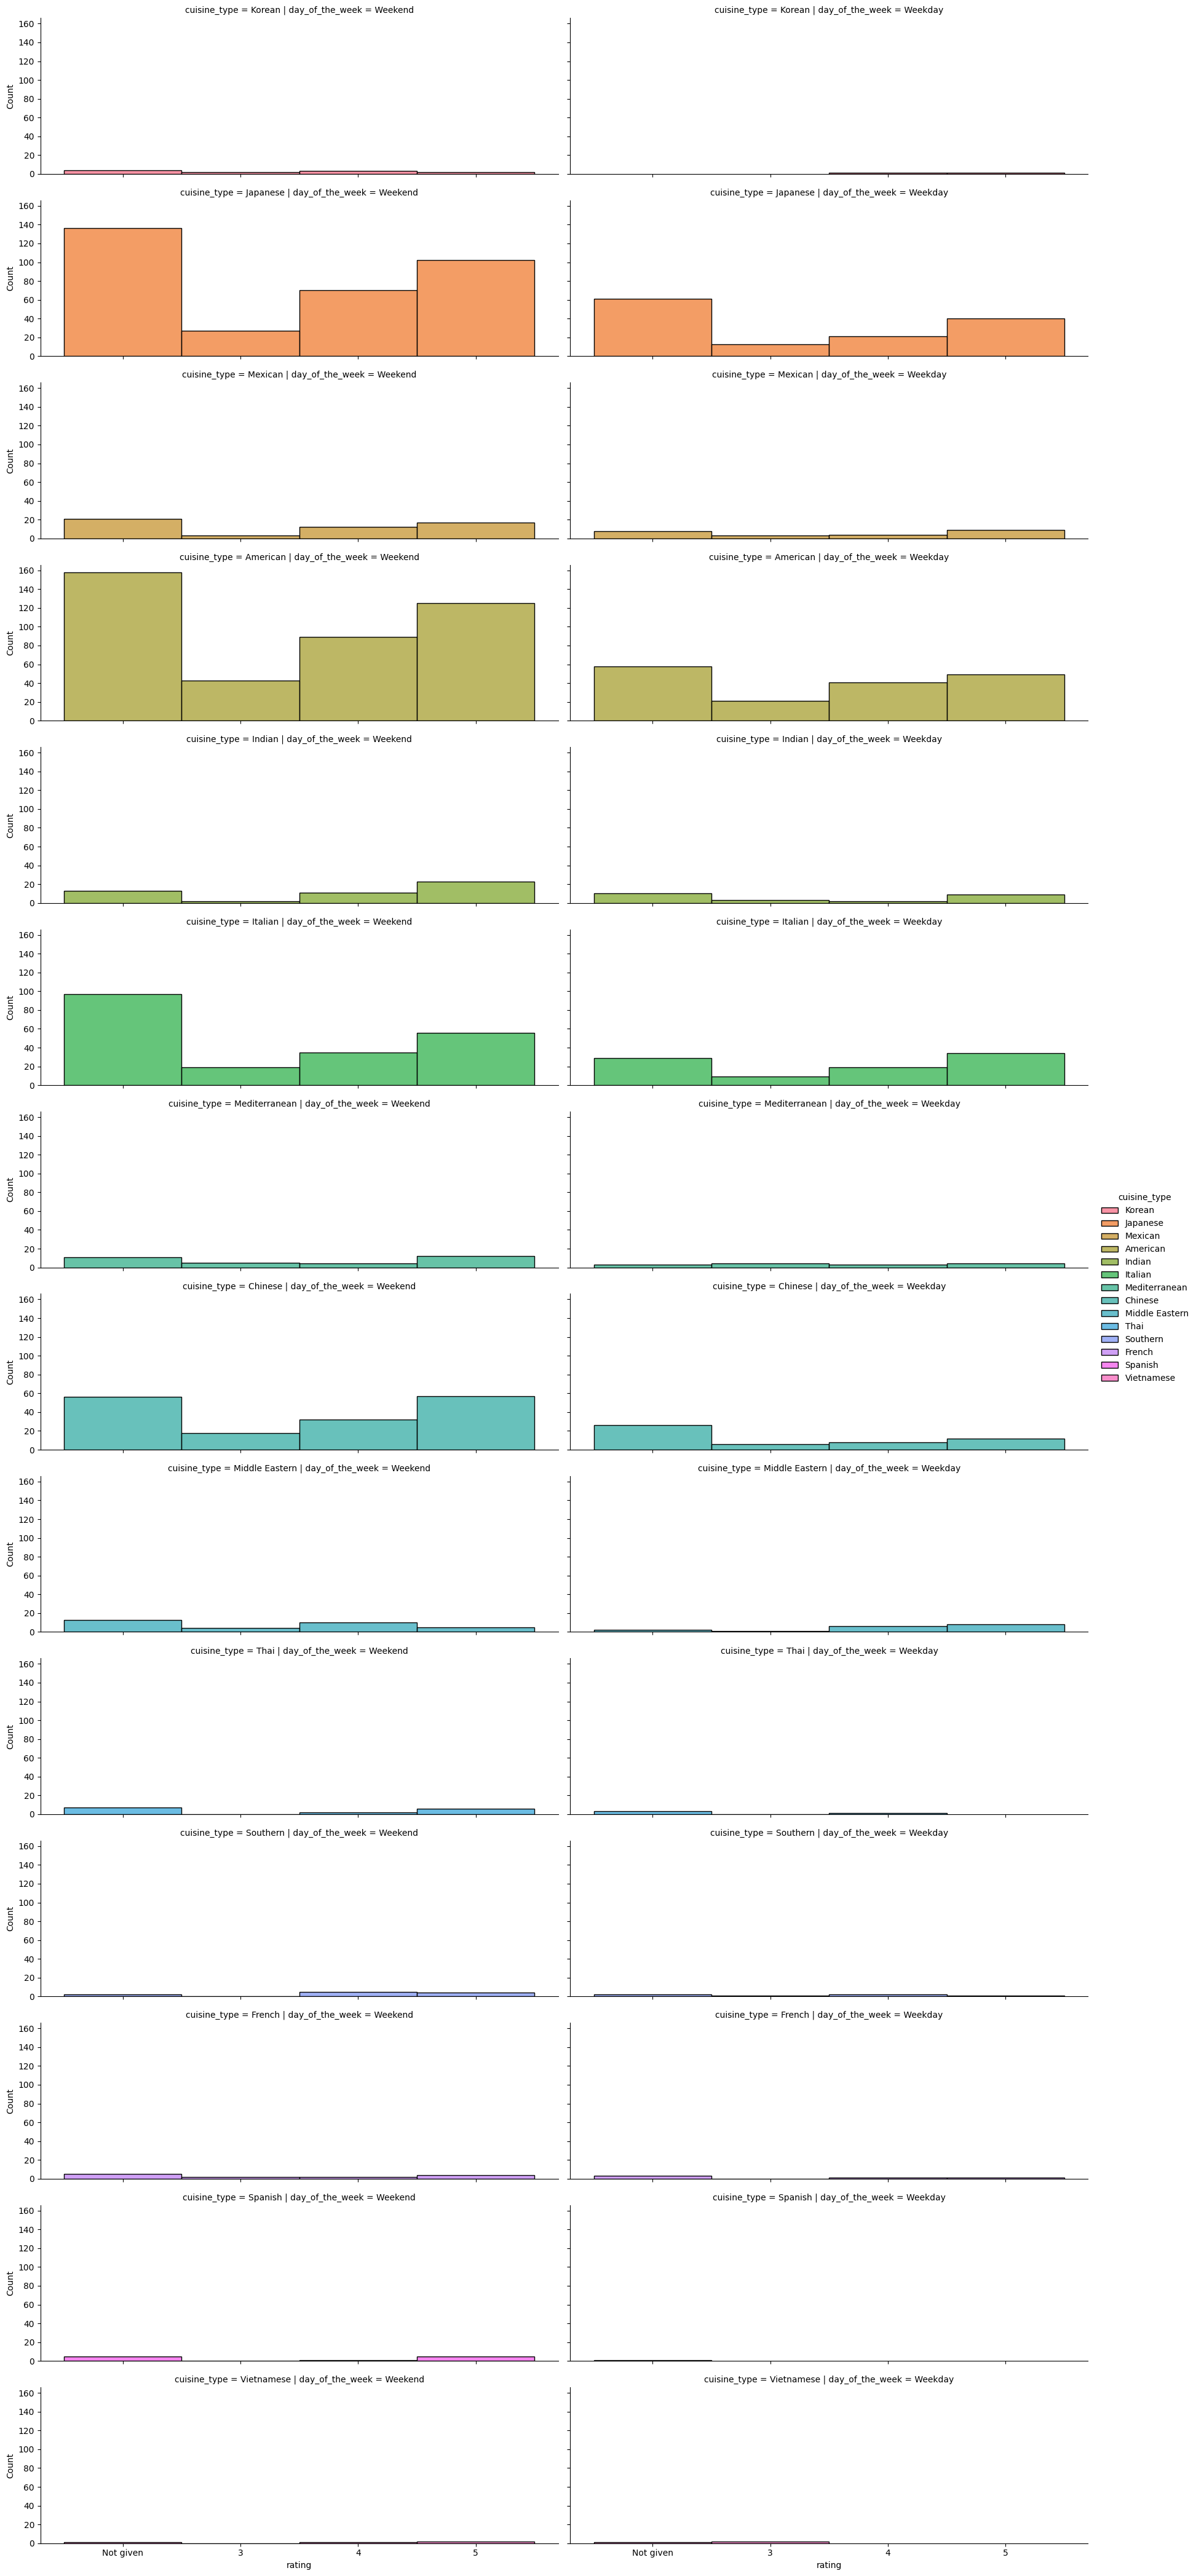

In [12]:
# Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. 
# (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


# ploting the relationship between the cost of the order and the prep time using a scatter plot with a hue as the rating
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='cost_of_the_order', y= 'day_of_the_week' , hue='cuisine_type')
plt.title('Cost of the Order vs Food Preparation Time')
plt.show()


# Using a facit grid to plot the relationship between the cost of the order and the prep time using a bar charts with cuisine type as the hue
g=sns.FacetGrid(data=df, col='day_of_the_week', row='cuisine_type', hue='cuisine_type', aspect=3)
g.map(sns.histplot, 'rating')
g.add_legend()
plt.show()






In [13]:

# Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. 
# The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. 
# Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

#get rid of the 'Not given' values
df_ratings_only = df[df['rating'] != 'Not given']

#convert the rating column to a float
df_ratings_only.loc[:, 'rating'] = df_ratings_only['rating'].astype(float)
                              

#group by restaurant name and get the mean and count of the ratings
df_resturants = df_ratings_only.groupby('restaurant_name')['rating'].agg(['mean', 'count'])

#filter the resturants that have a mean rating greater than 4 and a count greater than 50
df_resturants[(df_resturants['mean'] > 4) & (df_resturants['count'] > 50)].sort_values(by='mean', ascending=False)

# Organized by mean rating, with the Meatball Shop topping the list with a mean rating of 4.511 

# restaurant_name		    mean	    count
# The Meatball Shop	        4.511905	84
# Blue Ribbon Fried Chicken	4.328125	64
# Shake Shack	            4.278195	133
# Blue Ribbon Sushi	        4.219178	73


,mean,count
restaurant_name,,
The Meatball Shop,4.511905,84
Blue Ribbon Fried Chicken,4.328125,64
Shake Shack,4.278195,133
Blue Ribbon Sushi,4.219178,73


In [14]:
# Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

# Find the orders that are greater than 20 dollars
df_20 = df[df['cost_of_the_order'] > 20]

# Find the orders that are greater than 5 dollars but less than 20 dollars
df_15 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20)]

# Find the orders that are less than 5 dollars
df_5 = df[df['cost_of_the_order'] < 5]

# Calculate the revenue for each group
revenue_20 = df_20['cost_of_the_order'].sum() * 0.75
revenue_15 = df_15['cost_of_the_order'].sum() * 0.85
revenue_5  = df_5['cost_of_the_order'].sum()

# Add up the revenue
total_revenue = revenue_20 + revenue_15 + revenue_5

# Round the total revenue to 2 decimal places
print(round(total_revenue, 2))

# Total revenue is $25148.52

25148.52


In [15]:

# Question 15: The company wants to analyze the total time required to deliver the food. 
# What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? 
# (The food has to be prepared and then delivered.) [1 marks]

# create a new column that is the total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# count how many orders take more than 60 minutes to get delivered and divide by the total number of orders
round(sum(df['total_time'] > 60)/df.shape[0], 2)

# 11% of orders take more than 60 minutes to get delivered from the time the order is placed


0.11

In [16]:
# Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

#find the orders where the day of the week is a weekday
df_weekdays = df[df['day_of_the_week'] == 'Weekday']

#find the orders where the day of the week is a weekend
df_weekends = df[df['day_of_the_week'] == 'Weekend']


diffrence = round(df_weekdays['delivery_time'].mean() - df_weekends['delivery_time'].mean(), 2)
print('Delivery is', diffrence, 'minutes faster on weekends than on weekdays.')

# Delivery is 5.87 minutes faster on weekends than on weekdays.

Delivery is 5.87 minutes faster on weekends than on weekdays.


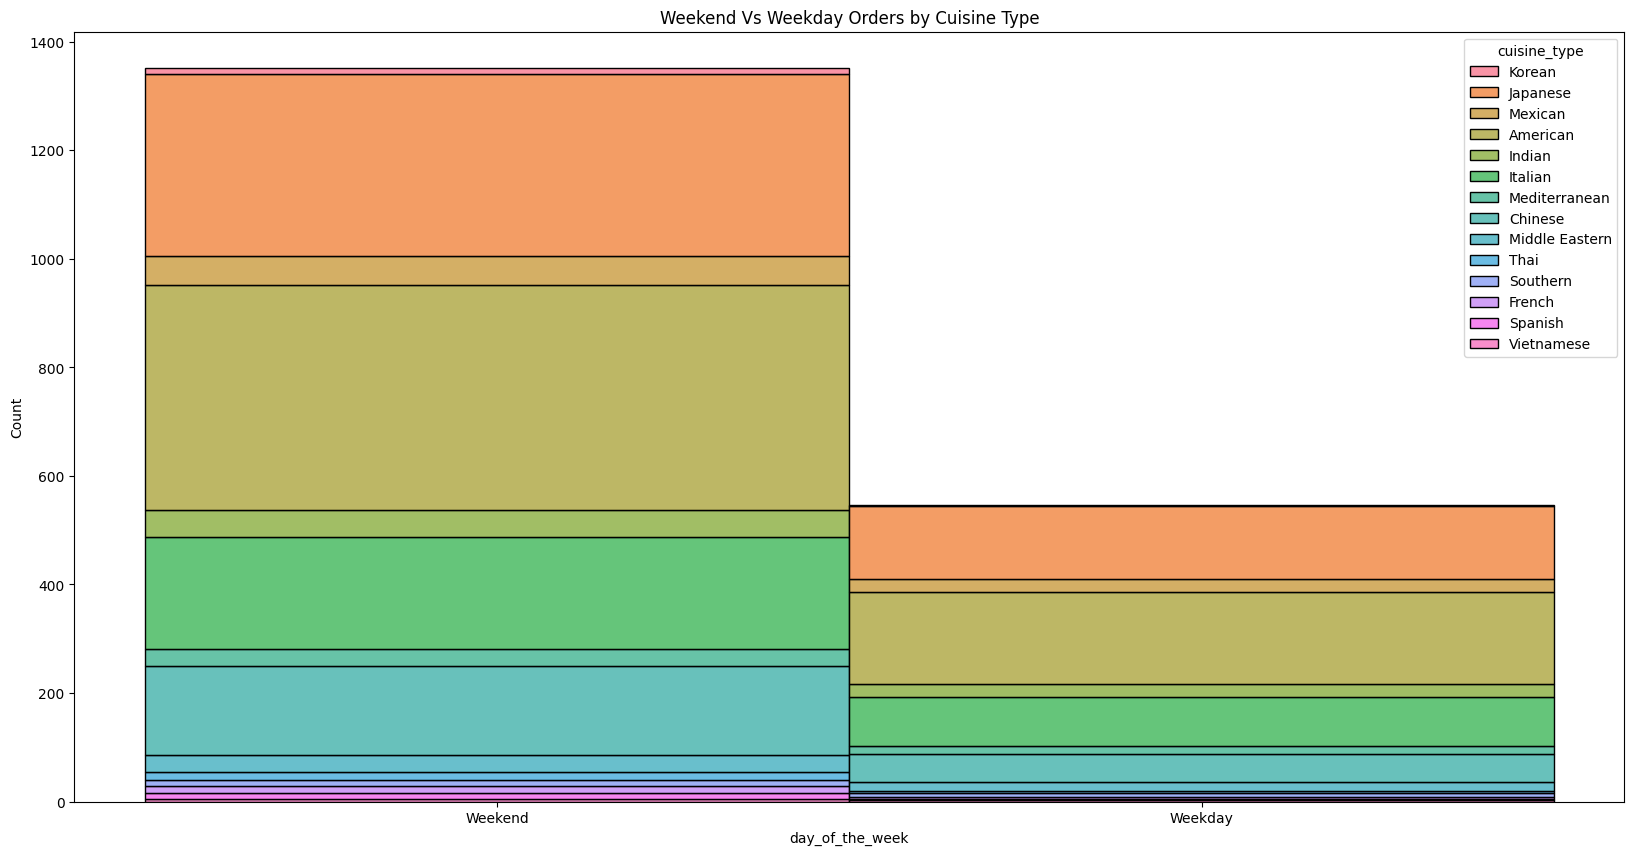

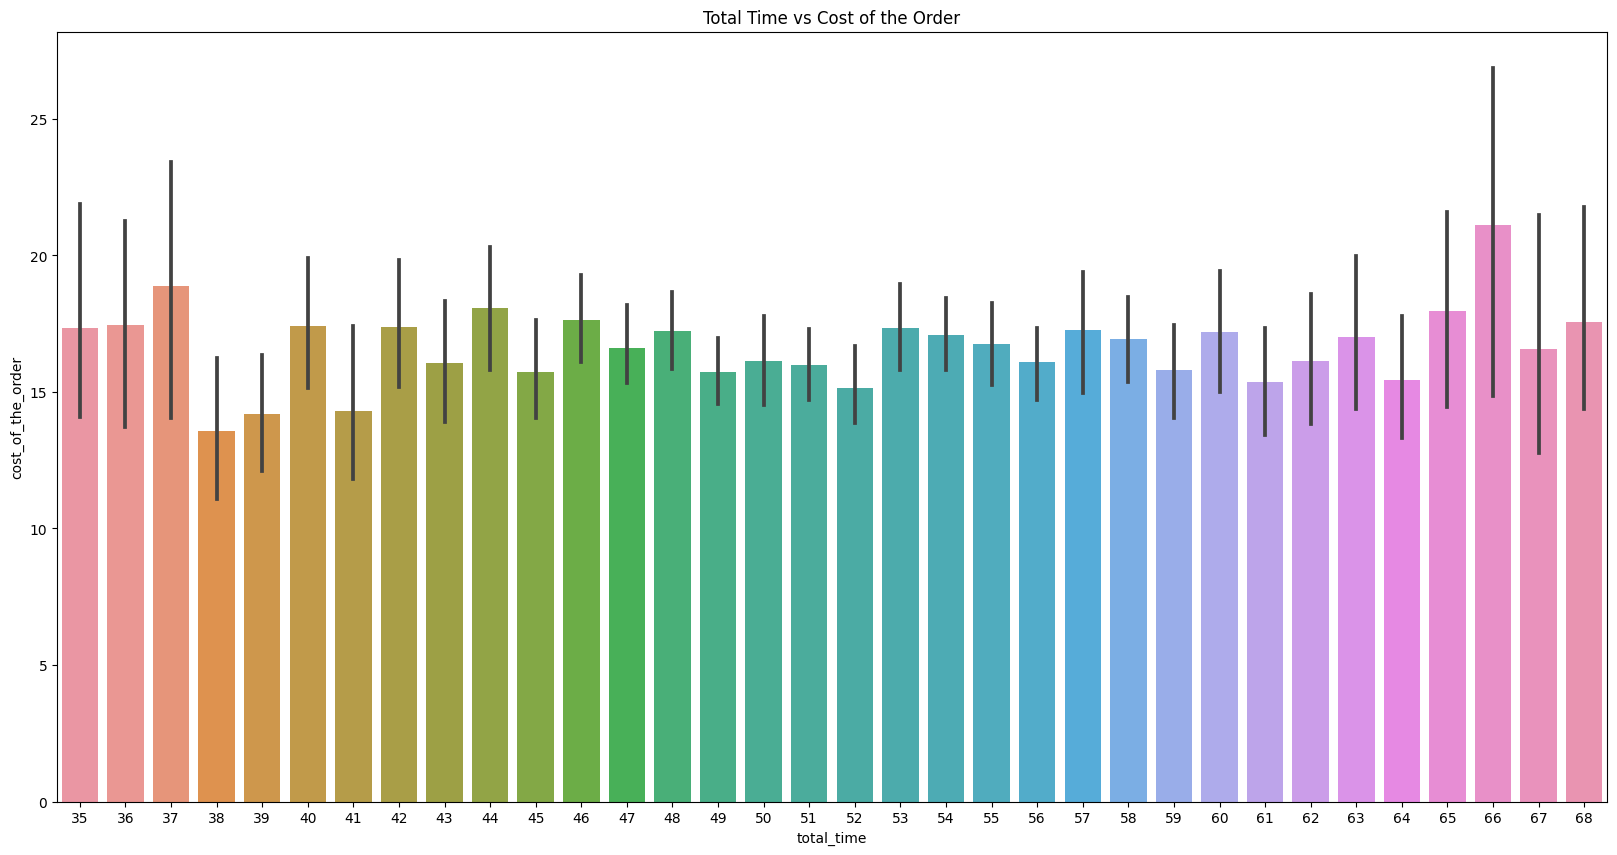

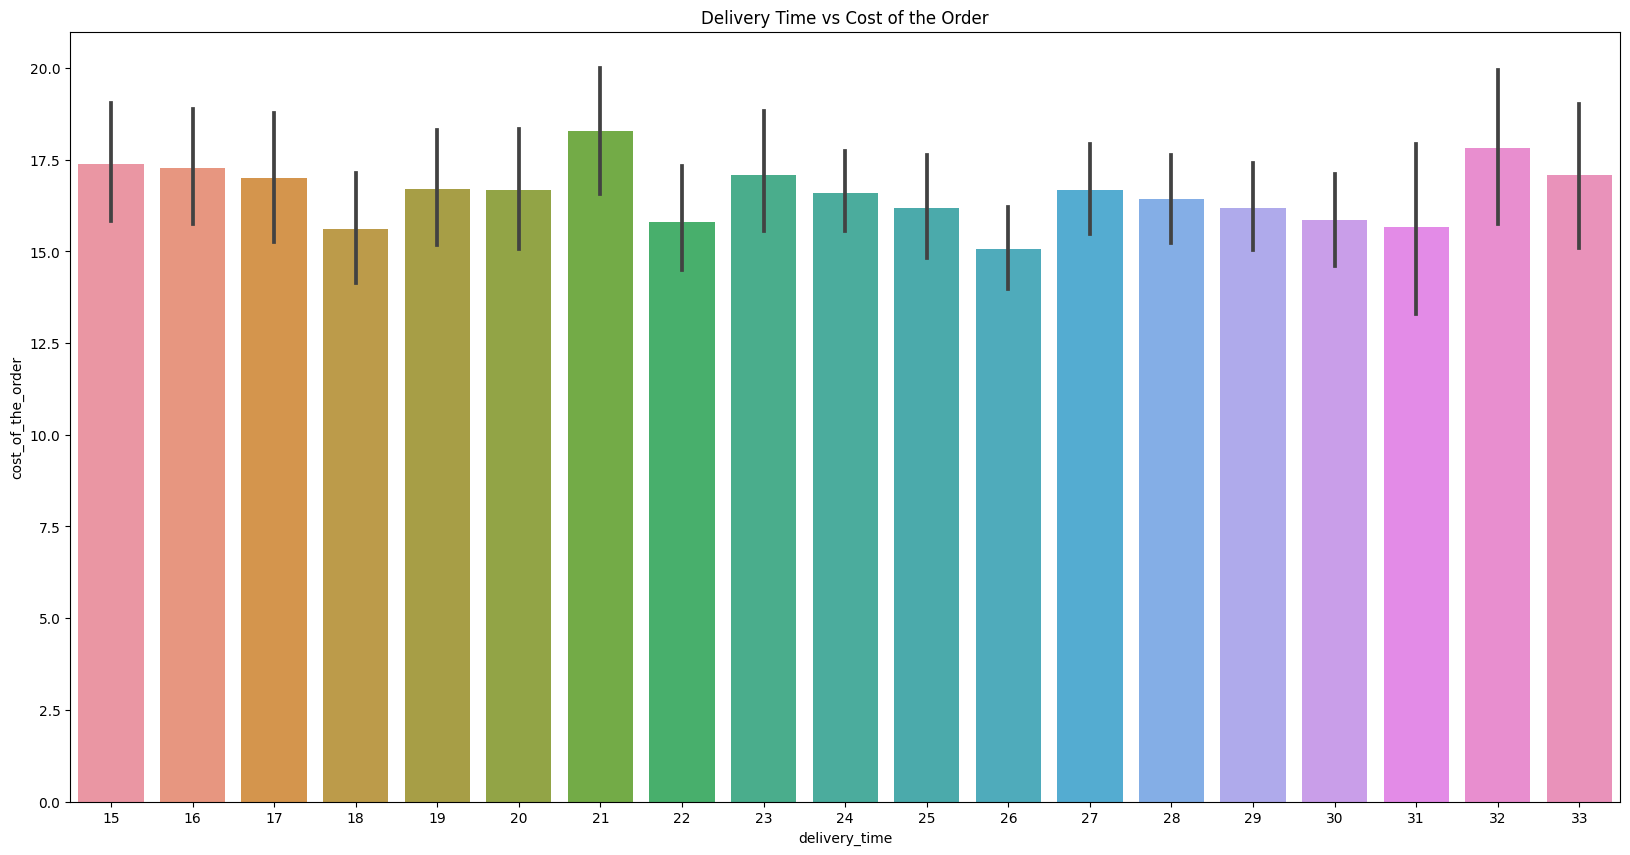

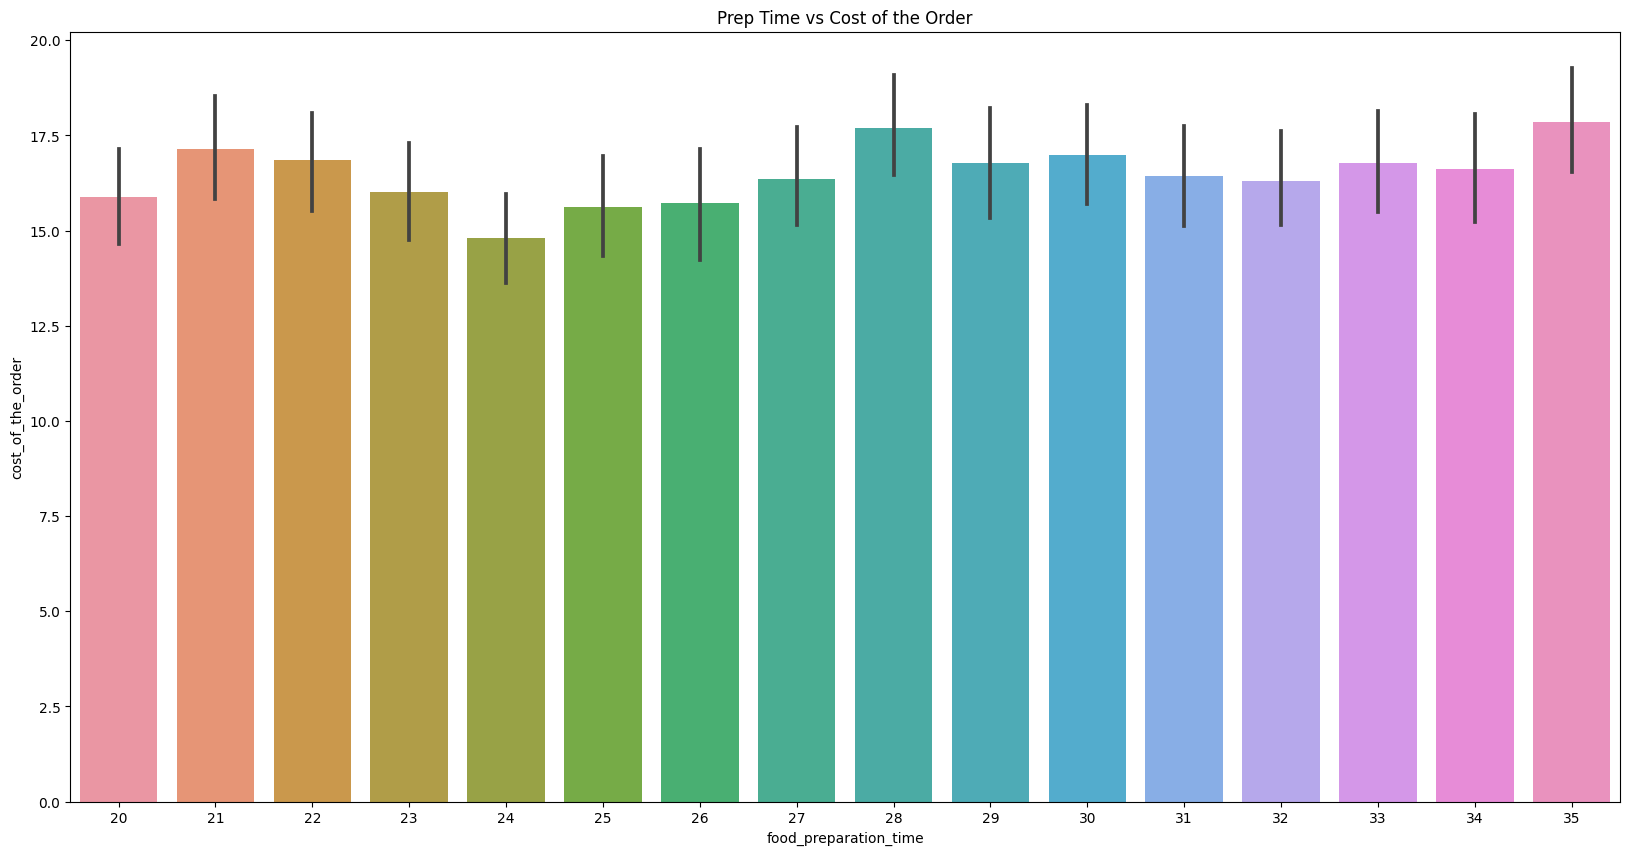

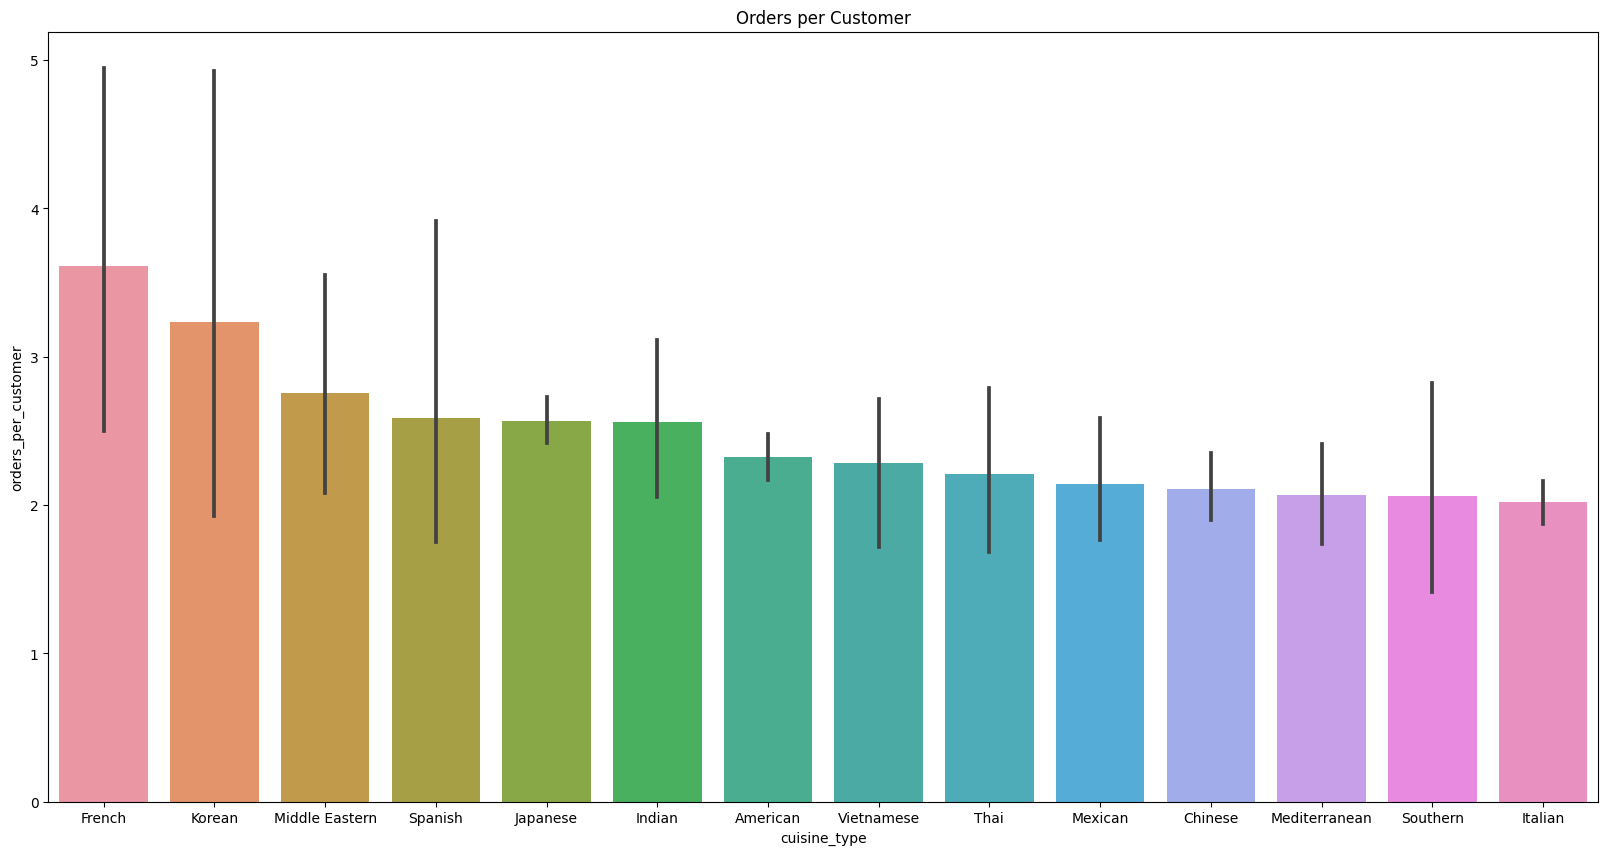

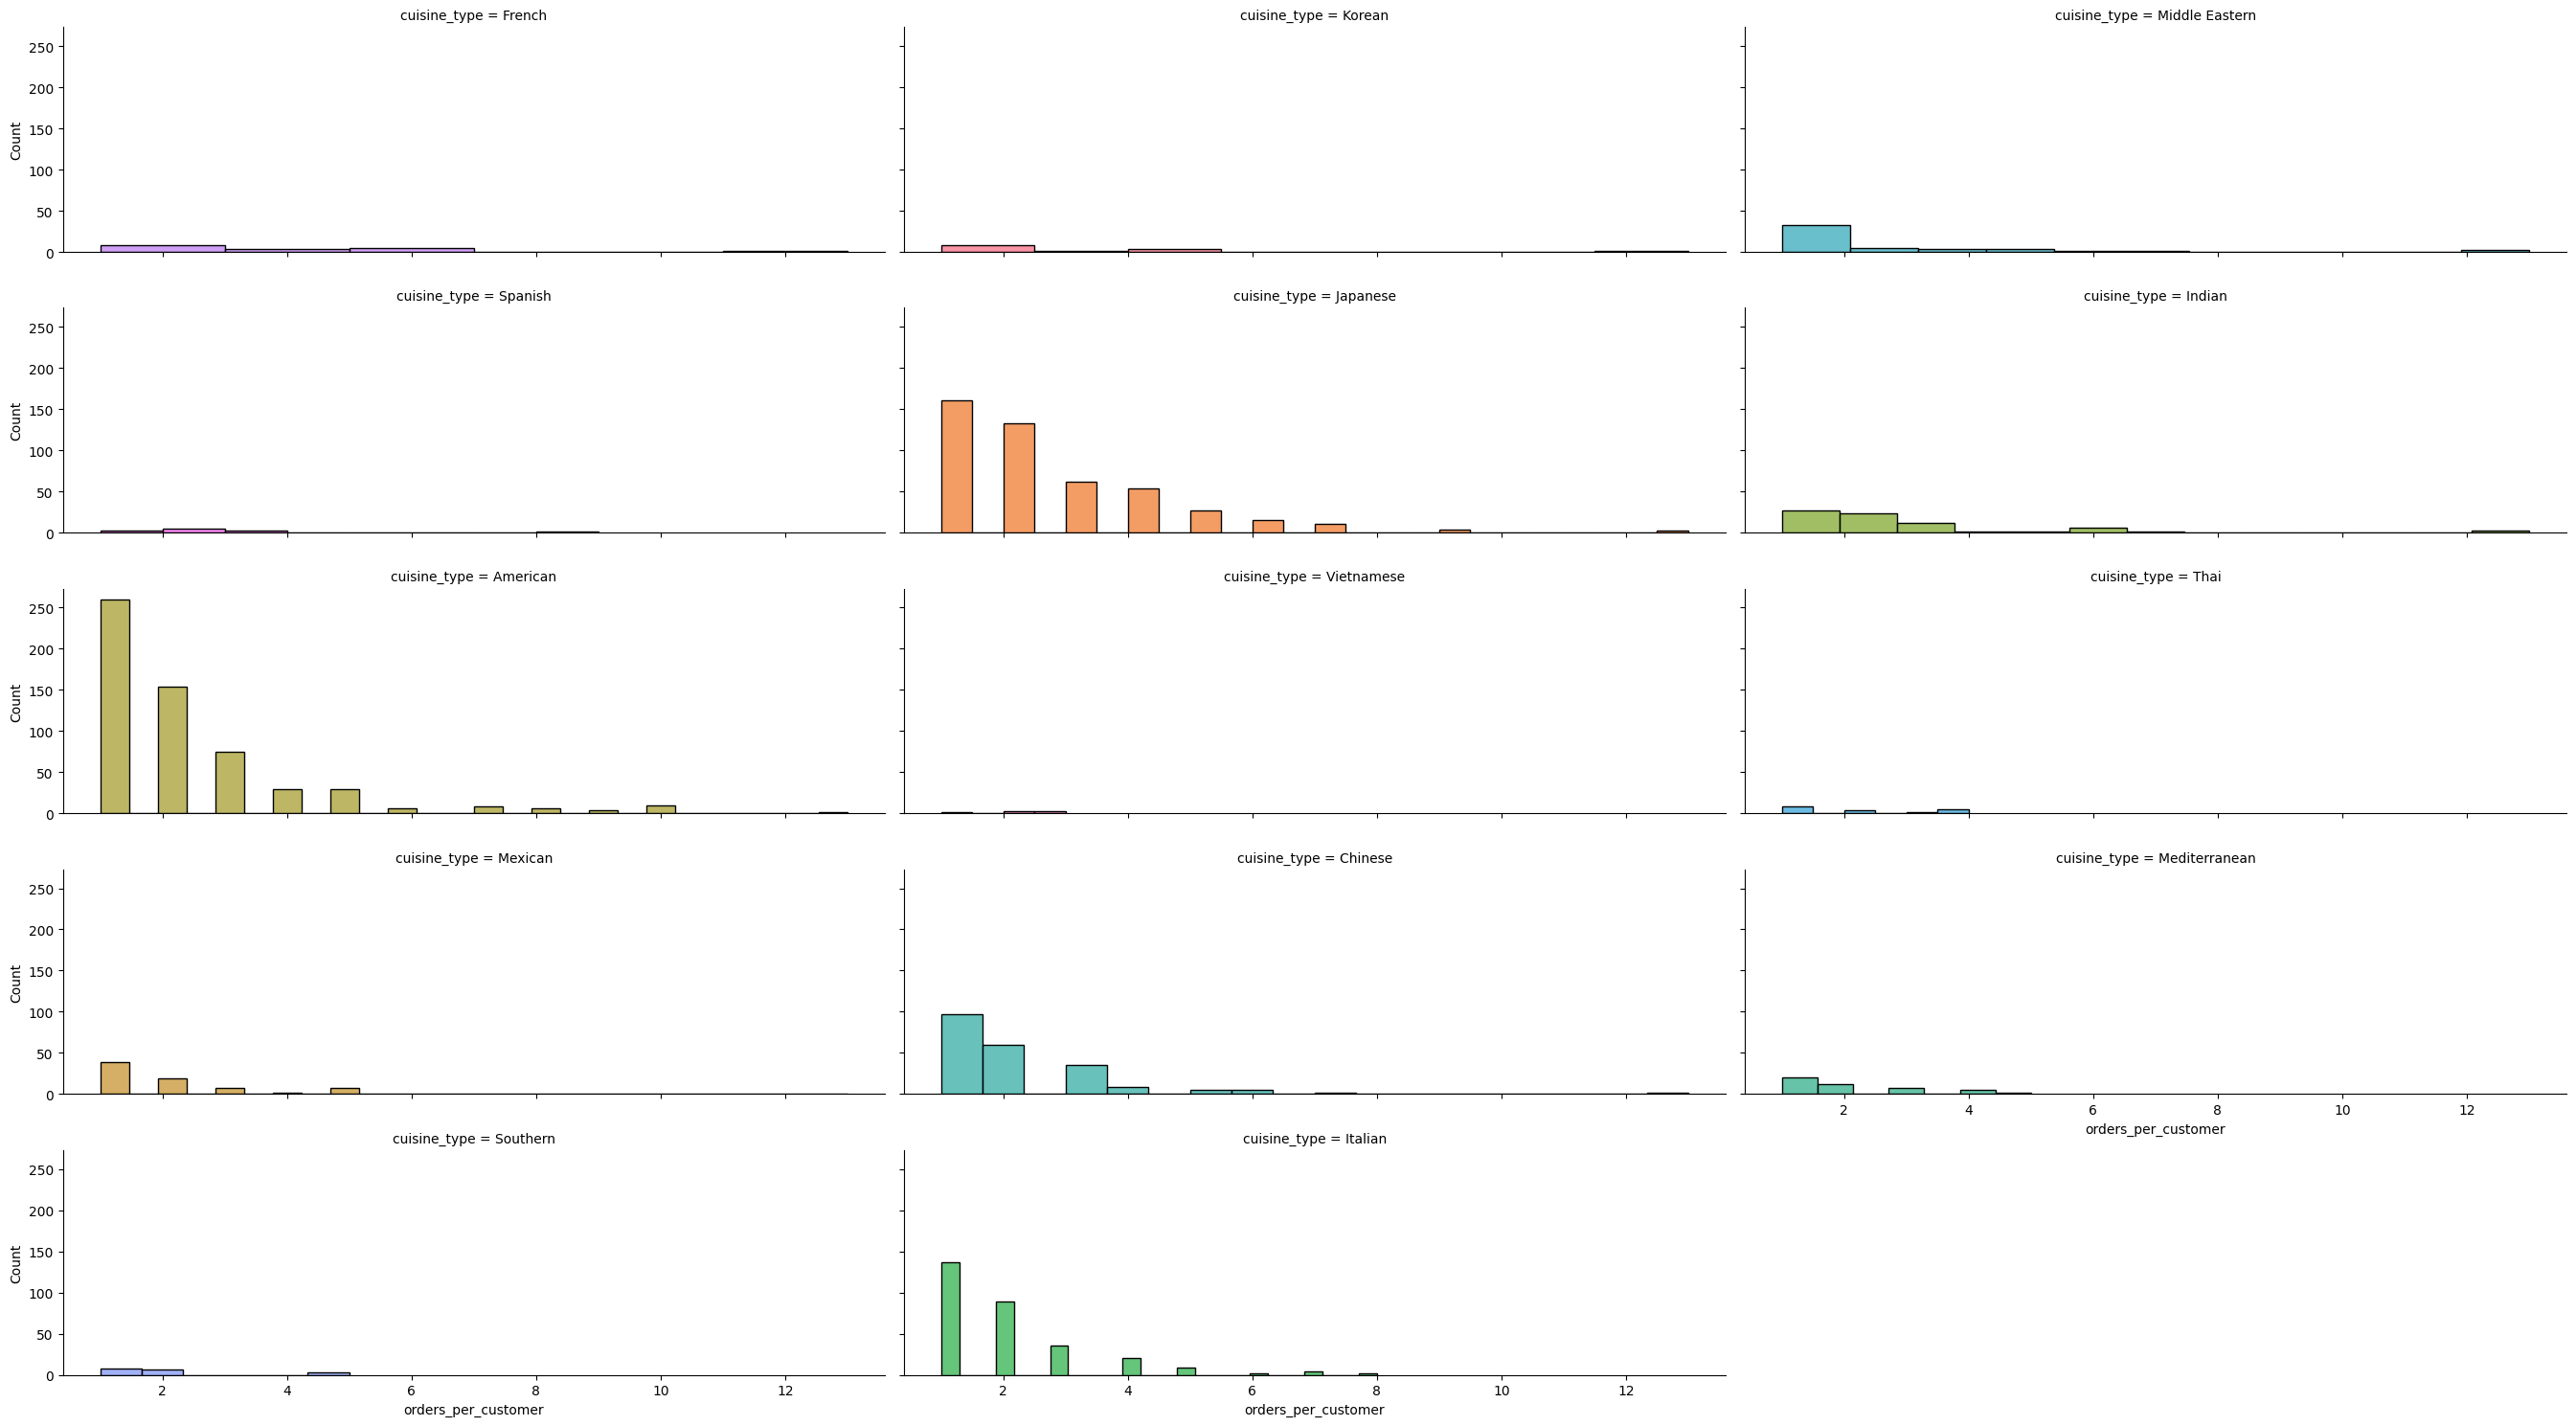

There are 3 outlier customers who order more than 8 times.


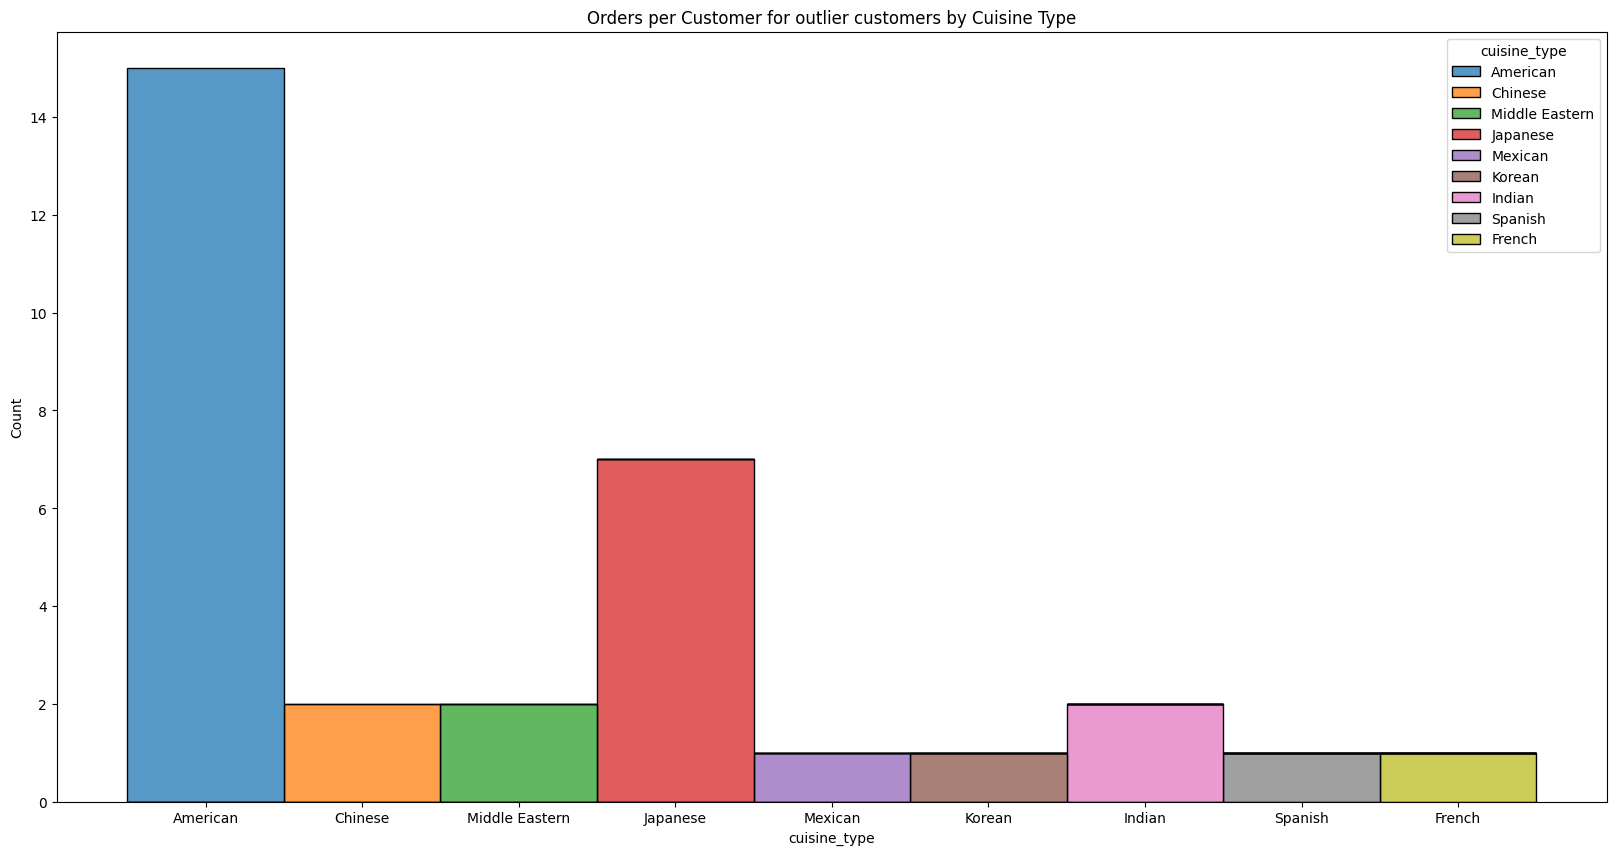

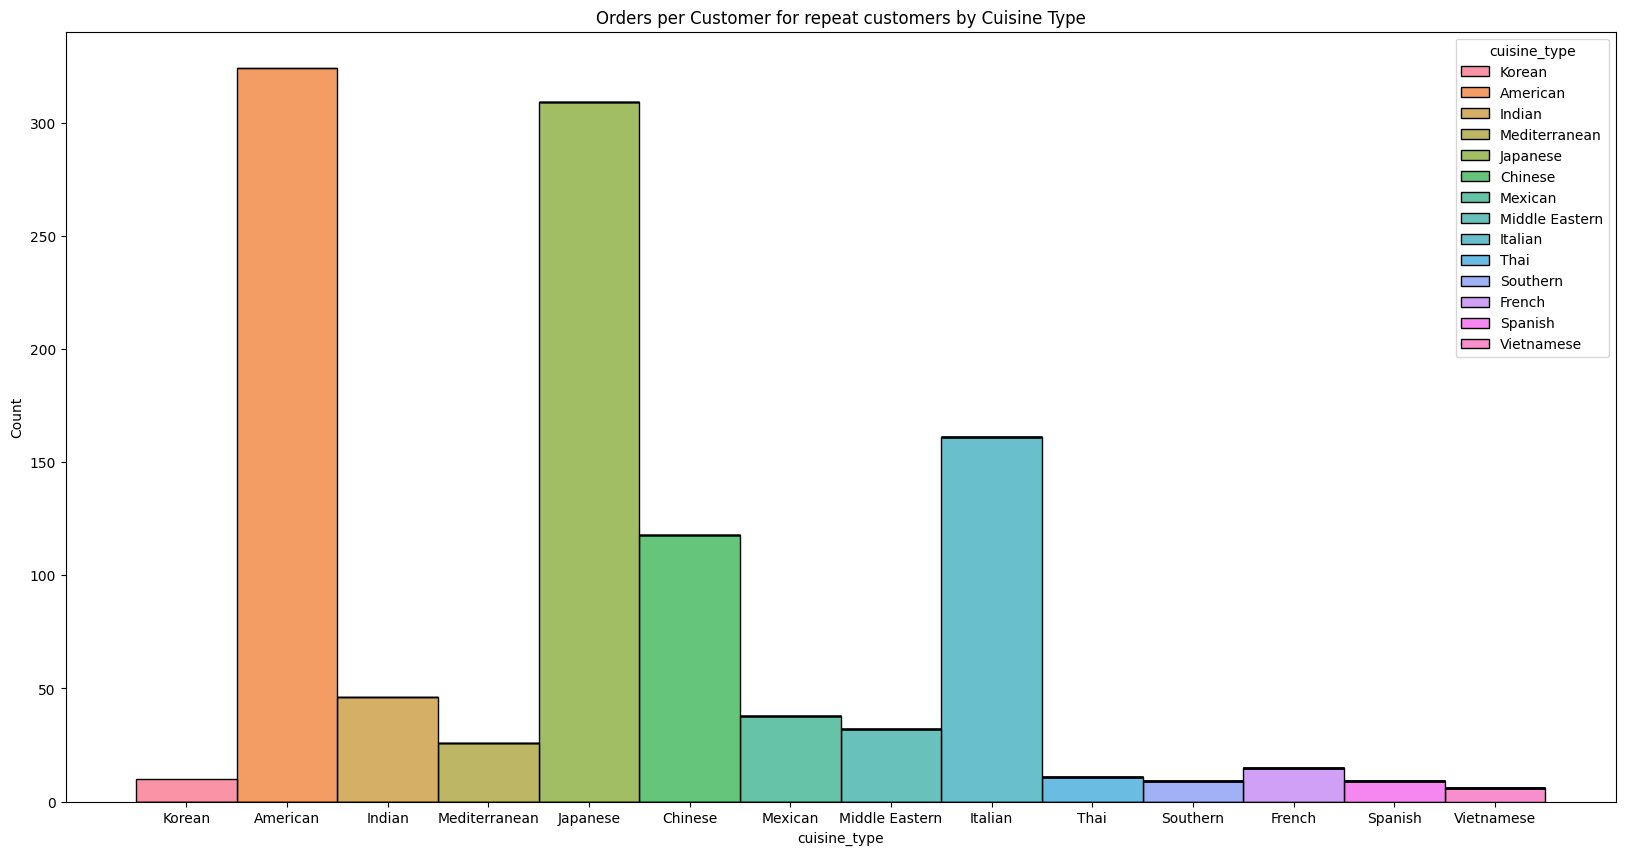

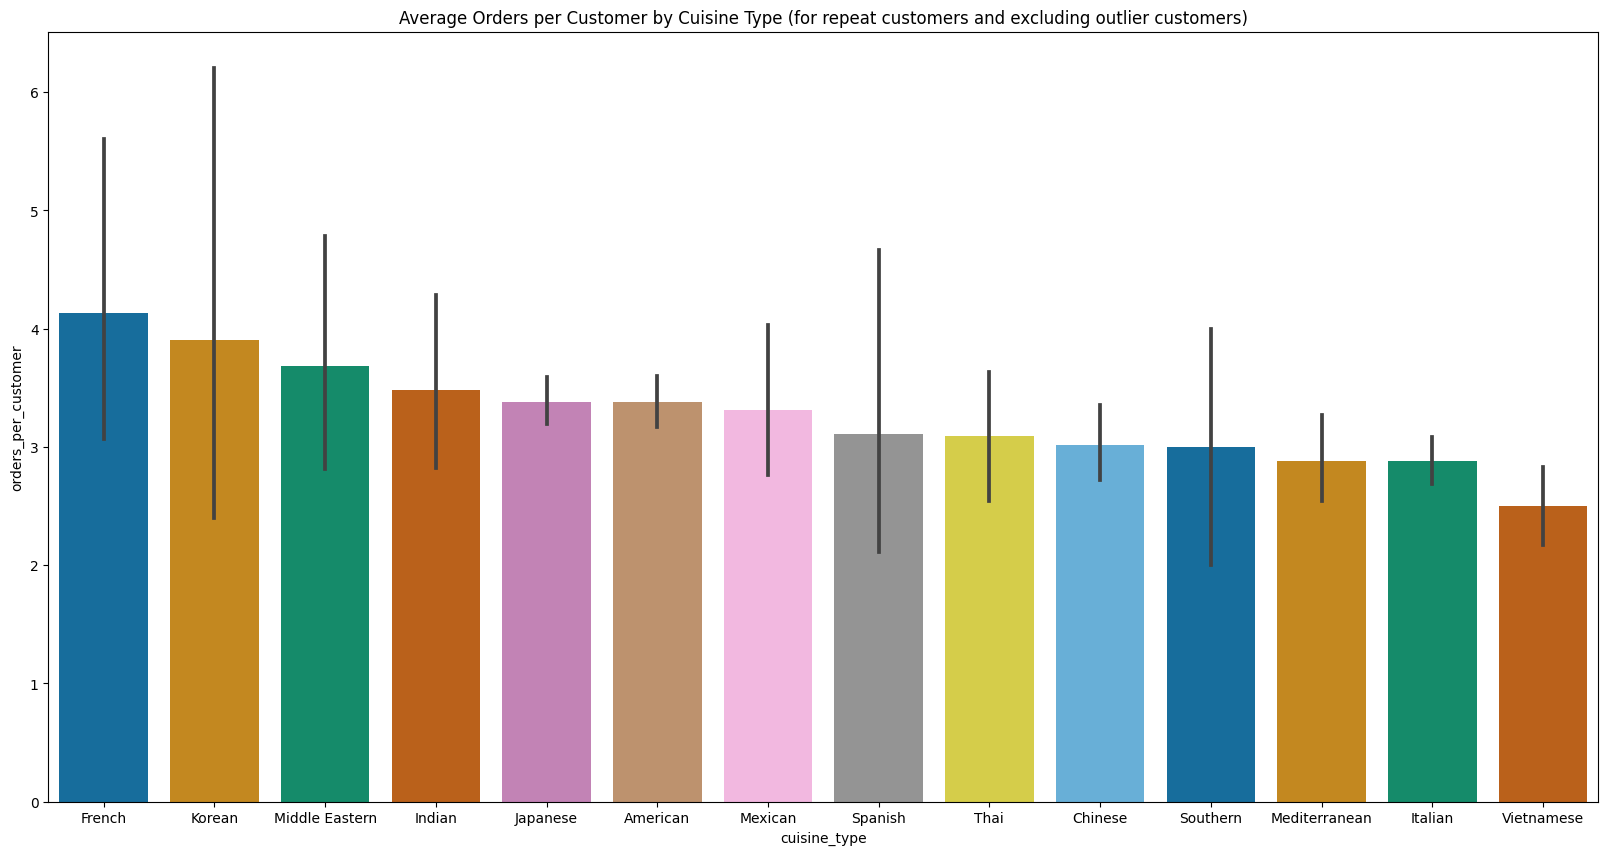

(1898, 11)

In [17]:
# Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]


#
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='day_of_the_week', hue='cuisine_type', multiple='stack')
plt.title('Weekend Vs Weekday Orders by Cuisine Type')
plt.show()


# Cost appears to stay constant no matter how much time is spent on prep/delivery. This shows that demand is somewhat inelastic, meaning you can increase the price without losing customers, and that you don't have to give discounts for long delivery/prep times.
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='total_time', y='cost_of_the_order')
plt.title('Total Time vs Cost of the Order')
plt.show()

plt.figure(figsize=(20,10))
sns.barplot(data=df, x='delivery_time', y='cost_of_the_order')
plt.title('Delivery Time vs Cost of the Order')
plt.show()

plt.figure(figsize=(20,10))
sns.barplot(data=df, x='food_preparation_time', y='cost_of_the_order')
plt.title('Prep Time vs Cost of the Order')
plt.show()


# It seems there aren't any strong relationships between many of the variables so far -- so next I'm investigating cuisine type to determine customer loyalty. 
# I first made a column that counts the number of average orders per customer for customers of each cusine type.
df['orders_per_customer'] = df.groupby('customer_id')['order_id'].transform('count')

# I sorted the cusine types by the average number of orders per customer. 
order = df.groupby('cuisine_type')['orders_per_customer'].mean().sort_values(ascending=False).index

plt.figure(figsize=(20,10))
sns.barplot(data=df, x='cuisine_type', y='orders_per_customer', order=order )
plt.title('Orders per Customer')
plt.show()

# Let's look at the distribution of orders per customer for each cusine type.
g = sns.FacetGrid(df, col='cuisine_type', col_wrap=3, height=3, aspect=3, hue='cuisine_type', col_order=order)
g.map(sns.histplot, 'orders_per_customer')
plt.show()


# Unfortunately, American cuisine is VERY popular and it's hard to get an idea of the distribution of orders per customer for the other cusine types.
# It also disproportionally weighs people who order more than 8 times over poeple who order 3 or 4 times -- especaially for cusine types with lower total customers. 
# Let's investigate if there are any customer IDs that are throwing these numbers off.
outlier_customers = df[df['orders_per_customer'] > 8]['customer_id'].unique()
print('There are', len(outlier_customers), 'outlier customers who order more than 8 times.')

# This is a histogram of the distribution of orders per customer for cusine types with outlier customers
plt.figure(figsize=(20,10))
sns.histplot(data=df[df['customer_id'].isin(outlier_customers)], x='cuisine_type', hue='cuisine_type', multiple='stack')
plt.title('Orders per Customer for outlier customers by Cuisine Type')
plt.show()



# This chart shows the distribution of orders per customer for cusine types with more than 1 order per customer, but excluding outlier customers. 
# In other words, where do people who order more then once order from?
# This shows the count of orders per customer for cusine types with more than 1 order per customer. Using total count lets us see that.
plt.figure(figsize=(20,10))
sns.histplot(data=df[df['orders_per_customer'] > 1], x='cuisine_type', hue='cuisine_type', multiple='stack')
plt.title('Orders per Customer for repeat customers by Cuisine Type')
plt.show()


# Lets look at the avrage number of customers again, but this time keep it to repeat customers (the people who we want to knwo more about)
# and exclude outlier customers
df_customers_who_matter = df[df['customer_id'] is not outlier_customers[0] and df['orders_per_customer'] > 1]
df_customers_who_matter.head()

# I sorted the cuisine types by the average number of orders per customer. 
order = df_customers_who_matter.groupby('cuisine_type')['orders_per_customer'].mean().sort_values(ascending=False).index

plt.figure(figsize=(20,10))
sns.barplot(data=df_customers_who_matter, x='cuisine_type', y='orders_per_customer', order=order, palette='colorblind' )
plt.title('Average Orders per Customer by Cuisine Type (for repeat customers and excluding outlier customers)')
plt.show()

# Looks like French cusine is still the most popular cusine type for repeat customers.


df.shape




################################################## (Not part of the project) ########################################################

# # Here is some work on time and rating. I wasn't able to debug in time, but I might come back to it later.
# # Get rid of unrated orders and convert the rating column to a float
# df_rated = df[df['rating'] != 'Not given']
# df_rated.loc[:, 'rating'](map (lambda x: float(x), df_rated['rating']))

# # calculate the mean rating given the cost of the order
# df_rated['avg_rating'] = df_rated.groupby('total_time')['rating'].transform('mean')
# df_rated['avg_rating'].loc[:, 'avg_rating'](map(lambda x: round(x, 2), df_rated['avg_rating']))


# # Time doesn't seem to impact raiting. This means that the company doesn't need to focus on speeding up delivery/prep time.
# plt.figure(figsize=(40,20))
# sns.barplot(data=df_rated, x = 'total_time', y = 'avg_rating')
# plt.title('Rating vs Total Time')
# plt.xticks(rotation=90)
# plt.show()

